In [1]:
import numpy as np

import pandas

data = pandas.read_csv('heart.csv')
print(data)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

In [2]:
data.isnull().values.sum()

0

In [3]:
normalized_data=(data-data.min())/(data.max()-data.min())
del normalized_data['target']

In [4]:
print(normalized_data)

          age  sex        cp  trestbps      chol  fbs  restecg   thalach  \
0    0.708333  1.0  1.000000  0.481132  0.244292  1.0      0.0  0.603053   
1    0.166667  1.0  0.666667  0.339623  0.283105  0.0      0.5  0.885496   
2    0.250000  0.0  0.333333  0.339623  0.178082  0.0      0.0  0.770992   
3    0.562500  1.0  0.333333  0.245283  0.251142  0.0      0.5  0.816794   
4    0.583333  0.0  0.000000  0.245283  0.520548  0.0      0.5  0.702290   
..        ...  ...       ...       ...       ...  ...      ...       ...   
298  0.583333  0.0  0.000000  0.433962  0.262557  0.0      0.5  0.396947   
299  0.333333  1.0  1.000000  0.150943  0.315068  0.0      0.5  0.465649   
300  0.812500  1.0  0.000000  0.471698  0.152968  1.0      0.5  0.534351   
301  0.583333  1.0  0.000000  0.339623  0.011416  0.0      0.5  0.335878   
302  0.583333  0.0  0.333333  0.339623  0.251142  0.0      0.0  0.786260   

     exang   oldpeak  slope    ca      thal  
0      0.0  0.370968    0.0  0.00  0.3333

In [5]:
from sklearn.model_selection import train_test_split, cross_val_score

In [6]:
X = np.array(normalized_data)
Y = np.array(data['target'])
X_t = X.transpose()
x_train, x_test, y_train, y_test = train_test_split(X, Y)
print(x_train)


[[0.625      0.         0.         ... 0.5        0.         0.66666667]
 [0.52083333 1.         0.33333333 ... 1.         0.25       1.        ]
 [0.29166667 1.         0.66666667 ... 1.         0.25       0.66666667]
 ...
 [0.45833333 0.         0.         ... 0.5        0.         1.        ]
 [0.         1.         0.33333333 ... 1.         0.         0.66666667]
 [0.33333333 1.         0.         ... 0.5        0.75       1.        ]]


In [7]:
import timeit

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
mean = []

scatter = []
timelist = []
time = []

for i in range (1, 21):
    dtc = DecisionTreeClassifier(random_state = 42, max_depth = i)
    r = cross_val_score(dtc, x_train, y_train, scoring = 'accuracy', cv = 5)
    scatter.append(r.max()-r.min())
    mean.append(r.mean())
    a = %timeit -o cross_val_score(dtc, x_train, y_train, scoring = "accuracy", cv = 5)
    timelist.append(a)
print(mean)
print(scatter)
for i in range (20):
    time.append(timelist[i].average)
print(time)

#print(max)
#print(min)

6.08 ms ± 61.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.49 ms ± 97.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.81 ms ± 36.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
7.1 ms ± 23.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
7.34 ms ± 49.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
7.52 ms ± 97 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
7.58 ms ± 36.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
7.59 ms ± 23.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
7.6 ms ± 33.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
7.68 ms ± 121 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
7.96 ms ± 753 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
8.48 ms ± 589 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
7.79 ms ± 232 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
7.61 ms ± 52.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


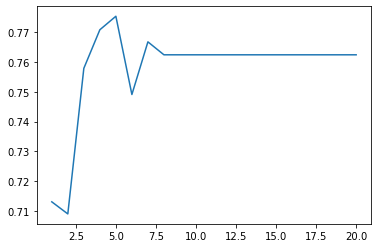

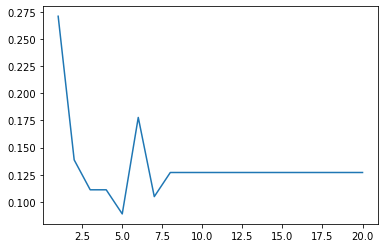

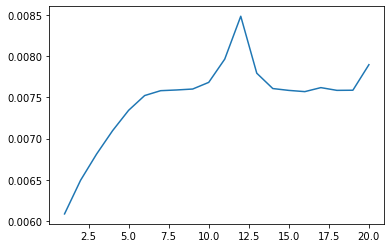

In [43]:
import matplotlib.pyplot as plt
X = np.linspace(1, 20, 20)
Mean = mean
Scatter = scatter
Time = time
plt.plot(X, Mean)
plt.show()
plt.plot(X, Scatter)
plt.show()
plt.plot(X, Time)
plt.show()


In [55]:
#i = 5 выглядит весьма перспективно
clf = DecisionTreeClassifier(random_state = 42, max_depth = 5)
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)
from sklearn.metrics import accuracy_score
result = accuracy_score(y_test, predictions)
print(result)

0.7894736842105263


In [1]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
a = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(a).plot()

NameError: name 'y_test' is not defined